# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [3]:
raw_data=pd.read_csv('real_estate_price_size_year_view.csv')

In [4]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


## Create a dummy variable for 'view'

In [5]:
data=raw_data.copy()

Sea view = 1 No sea view = 0

In [6]:
data['view']=data['view'].map({'Sea view': 1,'No sea view': 0})

In [7]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


## Create the regression

### Declare the dependent and the independent variables

In [8]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


check the **mean** of **view** <br>
It is 0.49000. <br>
It means 49% of the houses have Sea view.

### Regression

In [15]:
y=data['price']
x1=data[['size','year']]

In [14]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           2.77e-32
Time:                        21:47:18   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
y=data['price']
x1=data[['size','year','view']]

In [19]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.02e-50
Time:                        21:47:52   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **view** is Dummy Variable

price = -5.398e+06 + 223.0316\*size + 2718.9489\*year + 5.673e+04\*view <br>
- Sea view, price = -5.398e+06 + 223.0316\*size + 2718.9489\*year + 5.673e+04***1** <br>
- No sea view, price = -5.398e+06 + 223.0316\*size + 2718.9489\*year + 5.673e+04***0**

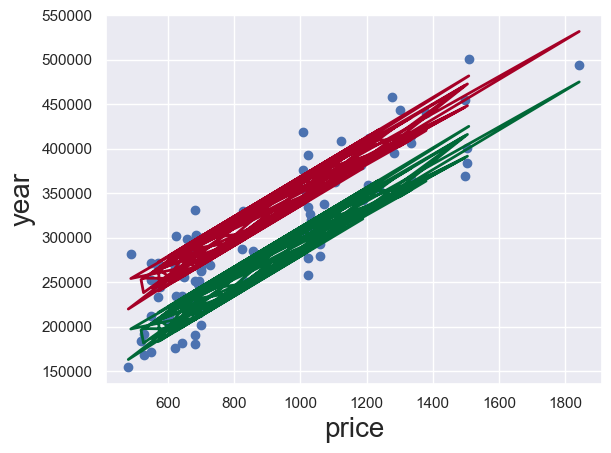

In [24]:
plt.scatter(data['size'],y)
yhat_no=-5.398e+06 + 223.0316*data['size'] + 2718.9489*data['year'] + 5.673e+04*0
yhat_yes=-5.398e+06 + 223.0316*data['size'] + 2718.9489*data['year'] + 5.673e+04*1
fig=plt.plot(data['size'],yhat_no, lw=2, c='#006837')
fig=plt.plot(data['size'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('price', fontsize=20)
plt.ylabel('year', fontsize=20)
plt.show()

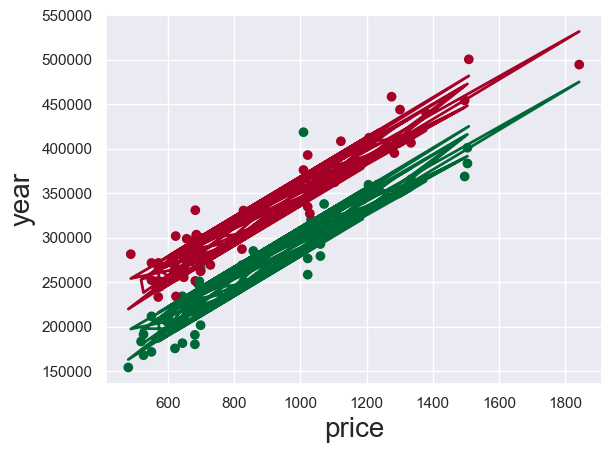

In [25]:
plt.scatter(data['size'],y,c=data['view'],cmap='RdYlGn_r')
yhat_no=-5.398e+06 + 223.0316*data['size'] + 2718.9489*data['year'] + 5.673e+04*0
yhat_yes=-5.398e+06 + 223.0316*data['size'] + 2718.9489*data['year'] + 5.673e+04*1
fig=plt.plot(data['size'],yhat_no, lw=2, c='#006837')
fig=plt.plot(data['size'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('price', fontsize=20)
plt.ylabel('year', fontsize=20)
plt.show()